## Supervised learning algorithms

### Preprocessing

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets
from resources.util_knn import plot_classification_iris
iris_data = datasets.load_iris()

#75% of data for training and the rest for testing

from sklearn.model_selection import train_test_split
x_iris, y_iris = iris_data.data, iris_data.target
# Test set will be the 25% taken randomly
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.25, random_state=33)
print(x_train.shape, x_test.shape)

(112, 4) (38, 4)


In [3]:
#Normalizing data (Gaussian distribution with zero mean and unit variance)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_test)

[[-0.09752318 -0.33607276  0.34628759  0.25602312]
 [ 1.06445511  0.08448757  0.45741713  0.3906456 ]
 [-1.25950146  0.29476773 -1.09839645 -1.2248242 ]
 [ 0.83205945 -0.54635292  0.56854667  0.52526808]
 [ 0.36726814 -0.96691325  1.12419438  0.3906456 ]
 [ 0.59966379  0.50504789  1.34645347  1.87149291]
 [-1.14330363  0.71532806 -0.93170214 -1.2248242 ]
 [-0.79471015  0.92560822 -1.209526   -1.09020172]
 [ 0.71586162  0.08448757  1.06862961  0.92913553]
 [ 1.29685076  0.29476773  1.17975915  1.60224795]
 [ 1.18065293  0.29476773  1.2908887   1.60224795]
 [-1.60809495 -0.1257926  -1.26509077 -1.2248242 ]
 [ 0.59966379  0.71532806  1.12419438  1.73687043]
 [ 0.36726814 -0.33607276  0.62411145  0.3906456 ]
 [ 1.29685076  0.08448757  0.84637053  1.60224795]
 [ 0.71586162 -0.33607276  0.40185236  0.25602312]
 [ 0.25107031 -0.1257926   0.67967622  0.92913553]
 [-0.67851232  0.92560822 -1.15396123 -1.2248242 ]
 [ 0.59966379  0.50504789  0.62411145  0.65989057]
 [ 1.64544425  0.29476773  1.34

### 1. kNN

#### Model training

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from resources.util_knn import plot_classification_iris

# Create kNN model
knn_model = KNeighborsClassifier(n_neighbors=13)

# Train the model using the training sets
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [5]:
from sklearn import metrics

y_train_prediction =  knn_model.predict(x_train)
print("Predicted\n", y_train_prediction)
print("Expected\n", y_train)
print("Train prediction accuray", metrics.accuracy_score(y_train_prediction, y_train))


Predicted
 [1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 1 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 2 1 1 0 1 1 0 2 1 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]
Expected
 [1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 2 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 1 0 1 1 0 2 2 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]
Train prediction accuray 0.9732142857142857


In [6]:
y_test_prediction =  knn_model.predict(x_test)
print("Predicted\n", y_test_prediction)
print("Expected\n", y_test)
print("Test prediction accuray", metrics.accuracy_score(y_test_prediction, y_test))

Predicted
 [1 1 0 1 2 2 0 0 2 2 2 0 2 1 2 1 2 0 1 2 0 0 2 0 1 2 1 1 2 2 1 1 1 2 2 2 2
 1]
Expected
 [1 1 0 1 2 2 0 0 2 2 2 0 2 1 2 1 2 0 1 2 0 0 2 0 2 2 1 1 2 2 1 1 2 2 2 2 2
 1]
Test prediction accuray 0.9473684210526315


ERROR:root:File `'util_knn.py'` not found.


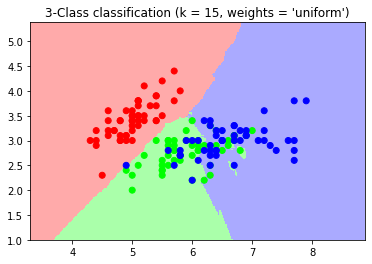

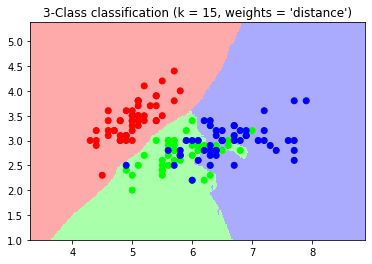

In [7]:
%run util_knn.py
plot_classification_iris()

#### Model evaluation

In [8]:
#K-Fold cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([
        ('scaler', StandardScaler()),
        ('kNN', KNeighborsClassifier())
])

cv = KFold(10, shuffle=True, random_state=33)

scores = cross_val_score(model, x_iris, y_iris, cv=cv)
print(scores)

[0.93333333 0.8        1.         0.93333333 0.93333333 0.93333333
 1.         1.         0.86666667 0.93333333]


In [9]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.933 (+/- 0.020)


In [10]:
# Precision, recall and f1-score

print("Training report\n", metrics.classification_report(y_train, y_train_prediction, target_names=iris_data.target_names))
print("Test report\n",metrics.classification_report(y_test, y_test_prediction, target_names=iris_data.target_names))

Training report
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        42
  versicolor       0.95      0.97      0.96        39
   virginica       0.97      0.94      0.95        31

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112

Test report
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.89      0.94        19

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



In [11]:
#Confussion matrix

print(metrics.confusion_matrix(y_test, y_test_prediction))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  2 17]]


#### Model tunning

[0.9473684210526315, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9210526315789473, 0.8947368421052632, 0.9473684210526315, 0.8947368421052632, 0.9210526315789473, 0.8947368421052632, 0.9473684210526315, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.8947368421052632, 0.9210526315789473, 0.8947368421052632]


Text(0, 0.5, 'Accuracy')

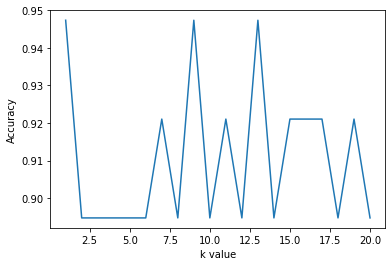

In [12]:
k_range = range(1, 21)
accuracy = []
for k in k_range:
    m = KNeighborsClassifier(k)
    m.fit(x_train, y_train)
    y_test_pred = m.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_test_pred))

print(accuracy)
plt.plot(k_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Accuracy')

### 2. Decision Tree

#### Model training

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Creating a decision tree model
dt_model = tree.DecisionTreeClassifier(max_depth = 3, random_state = 1)

#Training the model using the training sets
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [14]:
y_train_prediction = dt_model.predict(x_train)
print("Prediction", y_train_prediction)
print("Expected", y_train)
print("Predicted probabilities\n", dt_model.predict_proba(x_train[:10]))

Prediction [1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 2 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 2 1 1 0 1 1 0 2 1 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]
Expected [1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 2 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 1 0 1 1 0 2 2 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]
Predicted probabilities
 [[0.         0.97368421 0.02631579]
 [1.         0.         0.        ]
 [0.         0.97368421 0.02631579]
 [0.         0.97368421 0.02631579]
 [0.         0.97368421 0.02631579]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.97368421 0.02631579]
 [1.         0.         0.        ]
 [0.         0.         1.        ]]


In [15]:
#Calculate training accuracy
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_prediction))

Accuracy in training 0.9821428571428571


In [16]:
#Calculate testing accuracy
y_test_prediction = dt_model.predict(x_test)
print("Accuracy in testing", metrics.accuracy_score(y_test, y_test_prediction))

Accuracy in testing 0.9210526315789473


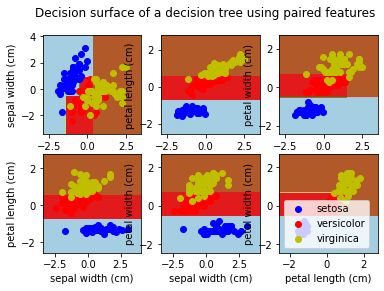

In [19]:
%run util_ds
%matplotlib inline
plot_tree_iris()


In [ ]:
print(iris_data.feature_names)
print(dt_model.feature_importances_)

#### Model evaluation

In [ ]:
print("Test report\n",metrics.classification_report(y_test, y_test_prediction, target_names=iris_data.target_names))

In [ ]:
#Confusion matrix
print(metrics.confusion_matrix(y_test, y_test_prediction))

In [ ]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a composite estimator made by a pipeline of preprocessing and the KNN model
model = Pipeline([
        ('scaler', StandardScaler()),
        ('DecisionTree', DecisionTreeClassifier())
])

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_iris, y_iris, cv=cv)
print(scores)

In [ ]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

#### Model tunning

In [ ]:
#Finding out the best value for "max_depth" parameter
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 10)}

gs = GridSearchCV(DecisionTreeClassifier(), param_grid)

gs.fit(x_train, y_train)

# summarize the results of the grid search
print("Best score: ", gs.best_score_)
print("Best params: ", gs.best_params_)

In [ ]:
model = Pipeline([
        ('scaler', StandardScaler()),
        ('DecisionTree', DecisionTreeClassifier(max_depth=3))
])

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_iris, y_iris, cv=cv)
print(scores)

def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))
